In [1]:
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import pandas as pd
import geopandas as gpd
import shapefile as shp
import numpy as np

import sys
sys.path.append("..")

from src.map_data import MapData 
from src import color_maps as cmaps

In [2]:
parisdata = MapData('../data/raw/CONTOURS-IRIS_D075.shp')
mapDF = parisdata.create_geometry_map('DCOMIRIS')

mapDF.head()

/home/codespace/.python/current/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,DEPCOM,NOM_COM,IRIS,NOM_IRIS,TYP_IRIS,coords,geometry
DCOMIRIS,,,,,,,
751010204,75101,Paris 1er Arrondissement,0204,Les Halles 4,H,"[(652285.81, 6862819.57), (652245.57, 6862834....","POLYGON ((652285.81000 6862819.57000, 652245.5..."
751010206,75101,Paris 1er Arrondissement,0206,Les Halles 6,A,"[(651617.7, 6862947.1), (651633.05, 6862980.25...","POLYGON ((651617.70000 6862947.10000, 651633.0..."
751010101,75101,Paris 1er Arrondissement,0101,Saint-Germain l'Auxerrois 1,H,"[(652186.3, 6862282.9), (652146.79, 6862191.03...","POLYGON ((652186.30000 6862282.90000, 652146.7..."
751010202,75101,Paris 1er Arrondissement,0202,Les Halles 2,H,"[(651540.0, 6862651.0), (651556.1, 6862654.1),...","POLYGON ((651540.00000 6862651.00000, 651556.1..."
751010102,75101,Paris 1er Arrondissement,0102,Saint-Germain l'Auxerrois 2,A,"[(651923.06, 6861773.04), (651925.7, 6861780.3...","POLYGON ((651923.06000 6861773.04000, 651925.7..."


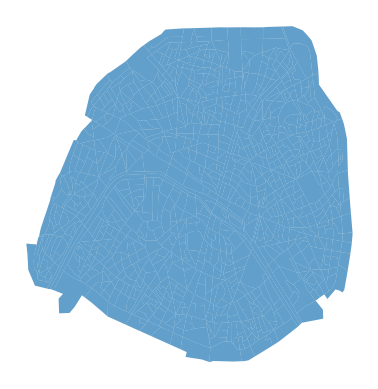

In [3]:
# Basic Paris Map plot
f, ax = plt.subplots(1)
ax = mapDF.plot(ax = ax, alpha = 0.7)
#f.suptitle('Paris')
ax.set_axis_off()
plt.show()

KMeans

In [4]:
# Reading Kmeans variable table file
df_kmeans = pd.read_csv('../data/final/paris_social_housing_kmeans.csv')
df_kmeans.IRIS.astype(int)
df_kmeans = df_kmeans.set_index('IRIS')
df_kmeans.head()

,Social_Housing,kmeans_class
IRIS,,
751010101,0.290378,0
751010102,0.000000,1
751010103,0.045988,1
751010104,0.000000,1
751010105,0.000000,1


In [5]:
# Joining both tables
joink = mapDF.join(df_kmeans)
joink.head()

,DEPCOM,NOM_COM,IRIS,NOM_IRIS,TYP_IRIS,coords,geometry,Social_Housing,kmeans_class
DCOMIRIS,,,,,,,,,
751010204,75101,Paris 1er Arrondissement,0204,Les Halles 4,H,"[(652285.81, 6862819.57), (652245.57, 6862834....","POLYGON ((652285.81000 6862819.57000, 652245.5...",0.202306,0
751010206,75101,Paris 1er Arrondissement,0206,Les Halles 6,A,"[(651617.7, 6862947.1), (651633.05, 6862980.25...","POLYGON ((651617.70000 6862947.10000, 651633.0...",0.000000,1
751010101,75101,Paris 1er Arrondissement,0101,Saint-Germain l'Auxerrois 1,H,"[(652186.3, 6862282.9), (652146.79, 6862191.03...","POLYGON ((652186.30000 6862282.90000, 652146.7...",0.290378,0
751010202,75101,Paris 1er Arrondissement,0202,Les Halles 2,H,"[(651540.0, 6862651.0), (651556.1, 6862654.1),...","POLYGON ((651540.00000 6862651.00000, 651556.1...",0.009278,1
751010102,75101,Paris 1er Arrondissement,0102,Saint-Germain l'Auxerrois 2,A,"[(651923.06, 6861773.04), (651925.7, 6861780.3...","POLYGON ((651923.06000 6861773.04000, 651925.7...",0.000000,1


In [6]:
# Reading Kmeans centroids table file
df_kmeans_centroids = pd.read_csv('../data/final/paris_social_housing_kmeans_centroids.csv')
df_kmeans_centroids = df_kmeans_centroids.set_index('class')
df_kmeans_centroids.head()

,centroids,count
class,,
0,0.040812,697
1,0.317130,185
2,0.765432,105


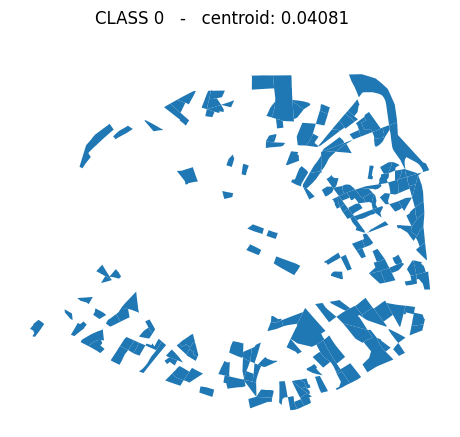

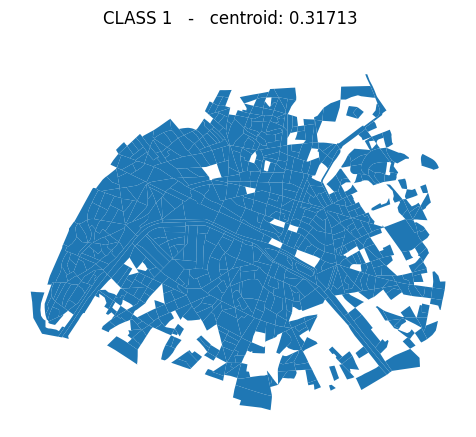

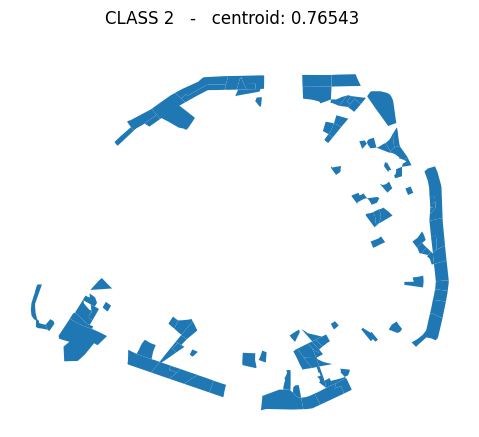

In [7]:
#class 0, 1, 2
classes = joink['kmeans_class'].unique()
classes.sort()
for i in classes:
    df_class = joink[joink.kmeans_class == i]
    f, ax = plt.subplots(1)
    ax = df_class.plot(ax = ax, aspect=1)
    cent = f"{df_kmeans_centroids.loc[i, 'centroids']:.5f}"
    f.suptitle('CLASS ' + str(i) + '   -   centroid: ' + cent)
    ax.set_axis_off()
    
plt.show()

Text(0.5, 1.0, 'Paris Social Housing - Kmeans Clustering')

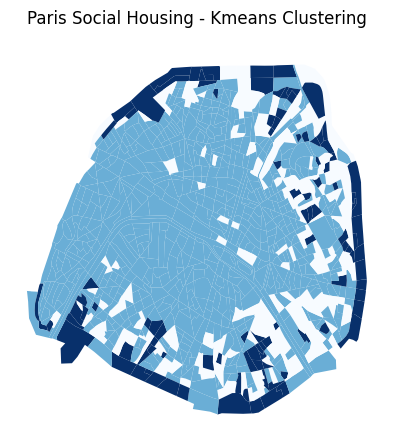

In [8]:
# Result KMeans Clustering
cmap = cmaps.createColormap('blue')
socialCasesKmeans = joink.copy()
socialCasesKmeans = socialCasesKmeans.plot(column='kmeans_class', cmap='Blues', figsize = (5, 5))
socialCasesKmeans.set_axis_off()
plt.title("Paris Social Housing - Kmeans Clustering")

MeanShift

In [9]:
# Reading Meanshift variable file
df_meanshift = pd.read_csv('../data/final/paris_social_housing_meanshift.csv')
df_meanshift.IRIS.astype(int)
df_meanshift = df_meanshift.set_index('IRIS')
df_meanshift.head()

,Social_Housing,meanshift_class
IRIS,,
751010101,0.290378,1
751010102,0.000000,0
751010103,0.045988,0
751010104,0.000000,0
751010105,0.000000,0


In [10]:
# Joining both tables
joinm = mapDF.join(df_meanshift)
joinm.head()

,DEPCOM,NOM_COM,IRIS,NOM_IRIS,TYP_IRIS,coords,geometry,Social_Housing,meanshift_class
DCOMIRIS,,,,,,,,,
751010204,75101,Paris 1er Arrondissement,0204,Les Halles 4,H,"[(652285.81, 6862819.57), (652245.57, 6862834....","POLYGON ((652285.81000 6862819.57000, 652245.5...",0.202306,0
751010206,75101,Paris 1er Arrondissement,0206,Les Halles 6,A,"[(651617.7, 6862947.1), (651633.05, 6862980.25...","POLYGON ((651617.70000 6862947.10000, 651633.0...",0.000000,0
751010101,75101,Paris 1er Arrondissement,0101,Saint-Germain l'Auxerrois 1,H,"[(652186.3, 6862282.9), (652146.79, 6862191.03...","POLYGON ((652186.30000 6862282.90000, 652146.7...",0.290378,1
751010202,75101,Paris 1er Arrondissement,0202,Les Halles 2,H,"[(651540.0, 6862651.0), (651556.1, 6862654.1),...","POLYGON ((651540.00000 6862651.00000, 651556.1...",0.009278,0
751010102,75101,Paris 1er Arrondissement,0102,Saint-Germain l'Auxerrois 2,A,"[(651923.06, 6861773.04), (651925.7, 6861780.3...","POLYGON ((651923.06000 6861773.04000, 651925.7...",0.000000,0


In [12]:
# Reading Kmeans centroids table file
df_meanshift_centroids = pd.read_csv('../data/final/paris_social_housing_meanshift_centroids.csv')
df_meanshift_centroids = df_meanshift_centroids.set_index('class')
df_meanshift_centroids.head()

,centroids,count
class,,
0,0.030861,779
1,0.515363,126
2,0.696947,31
3,0.849178,51


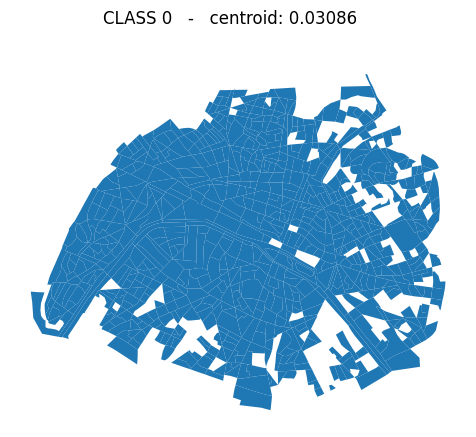

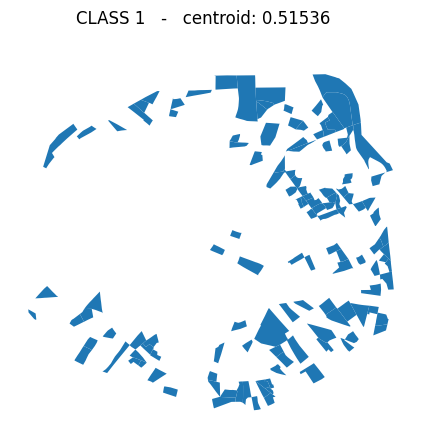

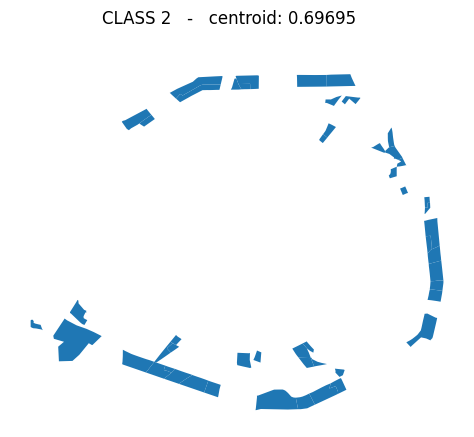

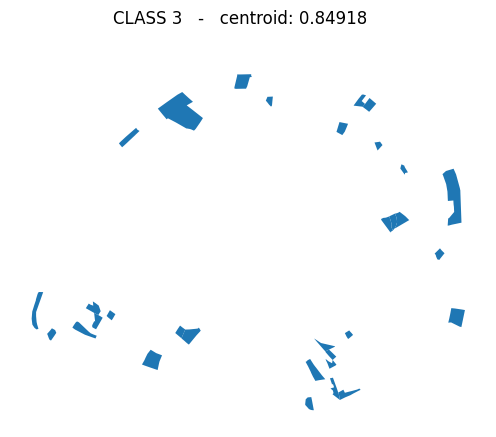

In [14]:
#class 0, 1, 2, 3
classes = joinm['meanshift_class'].unique()
classes.sort()
for i in classes:
    df_class = joinm[joinm.meanshift_class == i]
    f, ax = plt.subplots(1)
    ax = df_class.plot(ax = ax, aspect=1)
    cent = f"{df_meanshift_centroids.loc[i, 'centroids']:.5f}"
    f.suptitle('CLASS ' + str(i) + '   -   centroid: ' + cent)
    ax.set_axis_off()
    
plt.show()

Text(0.5, 1.0, 'Paris Social Housing - MeanShift Clustering')

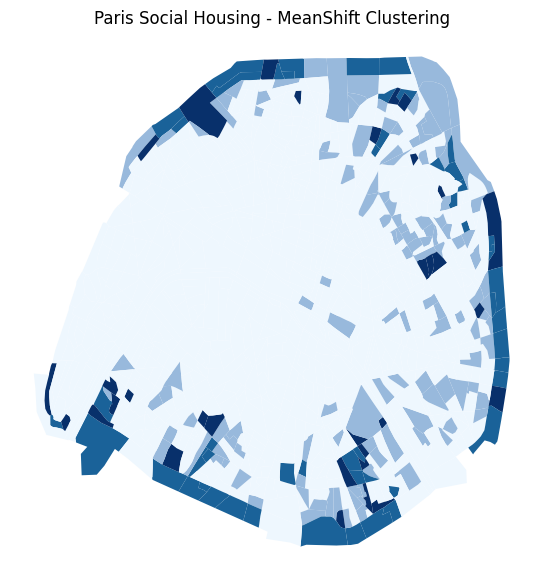

In [15]:
# Result Meanshift Clustering
cmap = cmaps.createColormap('blue')
socialCasesMeanshift = joinm
#socialCasesMeanshift = socialCasesMeanshift.plot(column='meanshift_class', cmap=cmap, scheme='natural_breaks', k = len(classes)-1,  figsize = (7, 7), legend=True)
socialCasesMeanshift = socialCasesMeanshift.plot(column='meanshift_class', cmap=cmap, figsize = (7, 7))
socialCasesMeanshift.set_axis_off()
plt.title("Paris Social Housing - MeanShift Clustering")